# Life Expectancy Analysis

In [1]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### Life Expectancy Dataset loaded and cleaned

In [2]:
Life_Exp_Male_df = pd.read_csv('Resources/WHO Life Expectancy Male.csv')
Life_Exp_Female_df = pd.read_csv('Resources/WHO Life Expectancy Female.csv')

# Rows with little or no data were removed from CSV file, easier to do in Excel. 

# Columns need to be converted to row data
Life_Exp_Male_df = pd.melt(Life_Exp_Male_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Male')
Life_Exp_Female_df = pd.melt(Life_Exp_Female_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Female')

# Merge Male / Female Data 
Life_Exp_df = pd.merge(Life_Exp_Male_df, Life_Exp_Female_df, on = ['Country', 'Year'])

# Reduce decimal places to 1
Life_Exp_df['Life Expectancy Male'] = Life_Exp_df['Life Expectancy Male'].round(1)
Life_Exp_df['Life Expectancy Female'] = Life_Exp_df['Life Expectancy Female'].round(1)

# Change any NaN values to ""
Life_Exp_df.fillna('', inplace = True)

Life_Exp_df

,Country,Year,Life Expectancy Male,Life Expectancy Female
0,Aruba,1960,60.6,67.8
1,Africa Eastern and Southern,1960,42.5,45.7
2,Afghanistan,1960,31.9,33.3
3,Africa Western and Central,1960,36.4,39.4
4,Angola,1960,36.6,39.9
...,...,...,...,...
16060,Kosovo,2022,,
16061,"Yemen, Rep.",2022,,
16062,South Africa,2022,,
16063,Zambia,2022,,


### Population Dataset loaded and cleaned

In [3]:
Population_df = pd.read_csv('Resources/WHO Population.csv')

# Columns need to be converted to row data
Population_df = pd.melt(Population_df, id_vars = 'Country', var_name = 'Year', value_name = 'Population')

# Merge Population with Main dataset
Life_Exp_df = pd.merge(Life_Exp_df, Population_df, on = ['Country', 'Year'])

Life_Exp_df

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population
0,Aruba,1960,60.6,67.8,54608
1,Africa Eastern and Southern,1960,42.5,45.7,130692579
2,Afghanistan,1960,31.9,33.3,8622466
3,Africa Western and Central,1960,36.4,39.4,97256290
4,Angola,1960,36.6,39.9,5357195
...,...,...,...,...,...
16060,Kosovo,2022,,,1761985
16061,"Yemen, Rep.",2022,,,33696614
16062,South Africa,2022,,,59893885
16063,Zambia,2022,,,20017675


In [4]:
# How many countries in dataset?
Life_Exp_df['Country'].nunique()

255

### GDP Dataset loaded and cleaned

In [5]:
GDP_df = pd.read_csv('Resources/WHO GDP.csv')

# Columns need to be converted to row data
GDP_df = pd.melt(GDP_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP')

# Change any NaN values to ""
GDP_df.fillna('', inplace = True)

Display_df = pd.DataFrame(GDP_df)
pd.set_option('display.float_format', '{:,.0f}'.format)

GDP_df

,Country,Year,GDP
0,Aruba,1960,
1,Africa Eastern and Southern,1960,"21,125,015,452"
2,Africa Western and Central,1960,"10,447,637,853"
3,Angola,1960,
4,Albania,1960,
...,...,...,...
14485,Samoa,2022,"832,421,565"
14486,"Yemen, Rep.",2022,
14487,South Africa,2022,"405,870,000,000"
14488,Zambia,2022,"29,784,454,056"


In [6]:
# How many countries in dataset?
GDP_df['Country'].nunique()

230

### OECD GDP Growth Dataset loaded and cleaned

In [7]:
# Load data into dataframe
GDP_Growth_df = pd.read_csv('Resources/OECD GDP Growth Data.csv')

In [13]:
# Removing rows where '1980' column has the value "no data"
GDP_Growth_df = GDP_Growth_df[(GDP_Growth_df['2000'] != 'no data') & (~GDP_Growth_df['2000'].isna())]

# Remove columns outside of 2000 - 2015
GDP_Growth_df = GDP_Growth_df[['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

In [ ]:
# Reshape the GDP_Growth_df so that years are listed in rows instead of columns

GDP_Growth_df_melted = pd.melt(GDP_Growth_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP Growth %')

# Convert the 'Year' column to integers
GDP_Growth_df_melted['Year'] = GDP_Growth_df_melted['Year'].astype(int)

GDP_Growth_df_melted.head()

,Country,Year,GDP Growth %
0,Albania,2000,6.9
1,Algeria,2000,3.8
2,Angola,2000,3.1
3,Antigua and Barbuda,2000,6.2
4,Argentina,2000,-0.8


In [ ]:
# How many countries in dataset?
GDP_Growth_df_melted['Country'].nunique()

216

### Line Chart showing life expectancy over time

In [14]:

# Grouping by 'Year' and 'Status' and calculating average life expectancy
m_grouped_df = Life_Exp_df.groupby(['Year'])['Life Expectancy Male'].mean().reset_index()
f_grouped_df = Life_Exp_df.groupby(['Year'])['Life Expectancy Female'].mean().reset_index()

# Creating the line chart
plt.figure(figsize =(10, 6))  

# Line plot for Males
plt.plot(m_grouped_df['Year'], m_grouped_df['Life Expectancy'], label='males', marker='o')

# Line plot for Females
plt.plot(f_grouped_df['Year'], f_grouped_df['Life Expectancy'], label='females', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=45) 

plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

### Scatter Plot showing Life Expectancy vs. Population

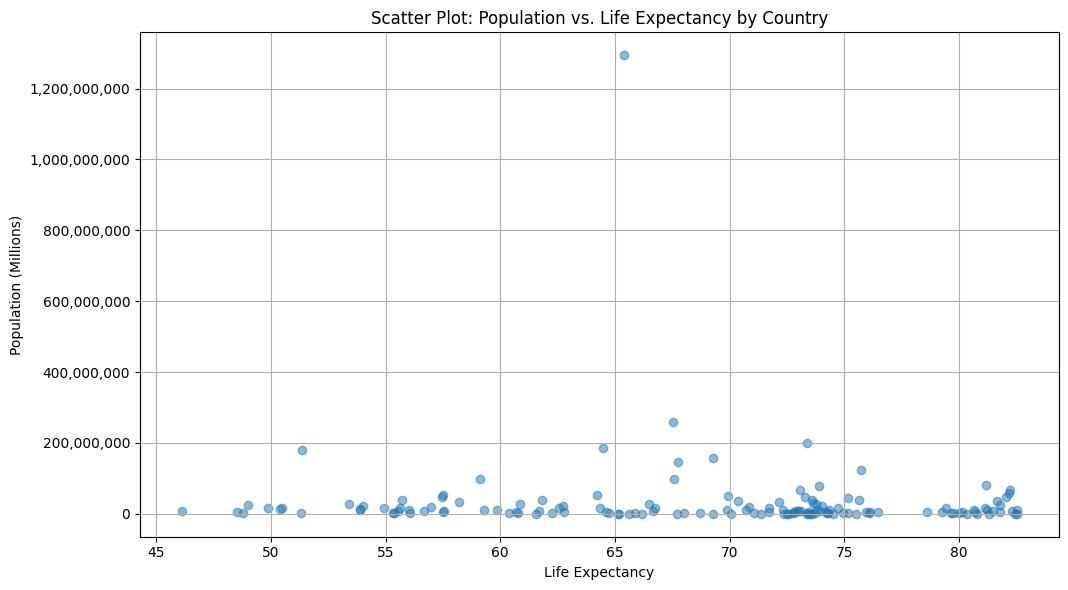

In [ ]:
# Group by 'Country' and calculate the average 'Life Expectancy' and total 'Population'
grouped_df = Life_Exp_df.groupby('Country').agg({
    'Life Expectancy': 'mean',
    'Population': 'max'
}).reset_index()

# Reverse the x and y-axis data
x = grouped_df['Life Expectancy']
y = grouped_df['Population']

# Convert population values to millions for labeling
y_labels_millions = [val / 1000000 for val in y]

plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed.
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of the points.

plt.xlabel('Life Expectancy')
plt.ylabel('Population (Millions)')  # Label the y-axis with population in millions
plt.title('Scatter Plot: Population vs. Life Expectancy by Country')

plt.grid(True)  # Add a grid to the plot.
plt.tight_layout()  # Improve spacing between elements.

# Format y-axis labels to display population in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()  # Display the plot.

In [ ]:
Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]
Outliers_df

/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_1723/2606399926.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]


,Country,Life Expectancy,Population
80,Ireland,80.1500,4676835.0
81,Israel,81.3000,82157.0
82,Italy,82.1875,59539717.0
84,Japan,82.5375,127854.0
85,Jordan,72.9875,8413464.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'Life_Exp_Report_df' with columns 'Country', 'BMI', and 'Life Expectancy'

# Calculate average BMI and Life Expectancy grouped by 'Country'
avg_data = Life_Exp_Report_df.groupby('Country').mean([['BMI', 'Life Expectancy']])

x_avg = avg_data['BMI']
y_avg = avg_data['Life Expectancy']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_avg, y_avg)

# Create the linear regression line using the calculated slope and intercept
regression_line = slope * x_avg + intercept

# Plot the linear regression line
plt.plot(x_avg, regression_line, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions (if needed)
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

NameError: name 'Life_Exp_Report_df' is not defined

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

cancer_data_load = Path("Resources/GBD study cancer data.csv")
HAQ_data_load = Path("Resources/GBD study HAQ data.CSV")

cancer_data = pd.read_csv(cancer_data_load)
HAQ_data = pd.read_csv(HAQ_data_load)

GBD_data_complete = pd.merge(cancer_data, HAQ_data, how="left", on=["location_name", "location_name"])
GBD_data_complete

,measure_id,measure_name,location_id_x,location_name,sex_id,sex_name,age_group_id_x,age_group_name_x,cause_id,cause_name,...,year_id_y,age_group_id_y,age_group_name_y,haq_index_age_type,indicator_id,indicator_name,measure,val_y,upper_y,lower_y
0,2,DALYs (Disability-Adjusted Life Years),1.0,Global,3.0,Both,27,Age-standardized,1029,Total cancers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DALYs (Disability-Adjusted Life Years),33.0,Armenia,3.0,Both,27,Age-standardized,1029,Total cancers,...,1990.0,27.0,Age-standardized,Overall,100.0,HAQ Index,Index,49.562603,50.994706,48.063668
2,2,DALYs (Disability-Adjusted Life Years),33.0,Armenia,3.0,Both,27,Age-standardized,1029,Total cancers,...,1990.0,27.0,Age-standardized,Overall,297.0,Tuberculosis,Mortality-to-incidence ratios (MIR),0.074881,0.089205,0.061404
3,2,DALYs (Disability-Adjusted Life Years),33.0,Armenia,3.0,Both,27,Age-standardized,1029,Total cancers,...,1990.0,27.0,Age-standardized,Overall,302.0,Diarrheal diseases,Mortality-to-incidence ratios (MIR),0.000361,0.000473,0.000271
4,2,DALYs (Disability-Adjusted Life Years),33.0,Armenia,3.0,Both,27,Age-standardized,1029,Total cancers,...,1990.0,27.0,Age-standardized,Overall,322.0,Lower respiratory infections,Risk-standardised death rates (RSD),0.000886,0.001056,0.000712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46958,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,486,Multiple myeloma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46959,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,487,Leukemia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46960,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,487,Leukemia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46961,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,487,Leukemia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cancer_data

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,cause_id,cause_name,...,year_id,year_start_id,year_end_id,metric_id,metric_name,metric_numerator_name,metric_denominator_name,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),1.0,Global,3.0,Both,27,Age-standardized,1029,Total cancers,...,2019.0,NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0.156322,NaN,NaN
1,2,DALYs (Disability-Adjusted Life Years),33.0,Armenia,3.0,Both,27,Age-standardized,1029,Total cancers,...,2019.0,NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0.159399,NaN,NaN
2,2,DALYs (Disability-Adjusted Life Years),34.0,Azerbaijan,3.0,Both,27,Age-standardized,1029,Total cancers,...,2019.0,NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0.226542,NaN,NaN
3,2,DALYs (Disability-Adjusted Life Years),35.0,Georgia,3.0,Both,27,Age-standardized,1029,Total cancers,...,2019.0,NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0.175258,NaN,NaN
4,2,DALYs (Disability-Adjusted Life Years),36.0,Kazakhstan,3.0,Both,27,Age-standardized,1029,Total cancers,...,2019.0,NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0.180321,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,486,Multiple myeloma,...,2019.0,NaN,NaN,NaN,Proportion,Multiple myeloma number,Total cancer number,0.002337,0.004306,0.000778
2317,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,487,Leukemia,...,2019.0,NaN,NaN,NaN,Proportion,Leukemia number,Total cancer number,0.026843,0.041782,0.014528
2318,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,487,Leukemia,...,2019.0,NaN,NaN,NaN,Proportion,Leukemia number,Total cancer number,0.063690,0.098356,0.031537
2319,2,DALYs (Disability-Adjusted Life Years),1.0,Global,2.0,Female,22,All Ages,487,Leukemia,...,2019.0,NaN,NaN,NaN,Proportion,Leukemia number,Total cancer number,0.033382,0.051709,0.015559


In [7]:
cancer_data.columns

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_group_id', 'age_group_name', 'cause_id', 'cause_name',
       'rei_id', 'rei_name', 'year_id', 'year_start_id', 'year_end_id',
       'metric_id', 'metric_name', 'metric_numerator_name',
       'metric_denominator_name', 'val', 'upper', 'lower'],
      dtype='object')

In [48]:
#Anna = (GBD_data_complete["location_name"].unique())
#Anna

In [9]:
location_count = (cancer_data["location_name"].unique())
location_count

array(['Global', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan',
       'Kyrgyzstan', 'Mongolia', 'Tajikistan', 'Turkmenistan',
       'Uzbekistan', 'Albania', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czechia', 'Hungary', 'Montenegro', 'North Macedonia',
       'Poland', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Belarus',
       'Estonia', 'Latvia', 'Lithuania', 'Republic of Moldova',
       'Russian Federation', 'Ukraine', 'Australia', 'New Zealand',
       'Brunei Darussalam', 'Japan', 'Republic of Korea', 'Singapore',
       'Canada', 'Greenland', 'United States of America', 'Argentina',
       'Chile', 'Uruguay', 'Andorra', 'Austria', 'Belgium', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'Norway', 'Portugal', 'San Marino', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom',
       'Bolivia (Plurinational State of)', 'Ecuador'

In [10]:
organized_cancer_data = cancer_data[["location_name","cause_name","measure_name","val","upper","lower"]]
organized_cancer_data


,location_name,cause_name,measure_name,val,upper,lower
0,Global,Total cancers,DALYs (Disability-Adjusted Life Years),0.156322,NaN,NaN
1,Armenia,Total cancers,DALYs (Disability-Adjusted Life Years),0.159399,NaN,NaN
2,Azerbaijan,Total cancers,DALYs (Disability-Adjusted Life Years),0.226542,NaN,NaN
3,Georgia,Total cancers,DALYs (Disability-Adjusted Life Years),0.175258,NaN,NaN
4,Kazakhstan,Total cancers,DALYs (Disability-Adjusted Life Years),0.180321,NaN,NaN
...,...,...,...,...,...,...
2316,Global,Multiple myeloma,DALYs (Disability-Adjusted Life Years),0.002337,0.004306,0.000778
2317,Global,Leukemia,DALYs (Disability-Adjusted Life Years),0.026843,0.041782,0.014528
2318,Global,Leukemia,DALYs (Disability-Adjusted Life Years),0.063690,0.098356,0.031537
2319,Global,Leukemia,DALYs (Disability-Adjusted Life Years),0.033382,0.051709,0.015559


In [11]:
organized_cancer_data["location_name"].value_counts()

Non-high SDI                        842
Global                              761
High SDI                            448
Low SDI                               6
Low-middle SDI                        6
                                   ... 
Saint Vincent and the Grenadines      1
Suriname                              1
Trinidad and Tobago                   1
United States Virgin Islands          1
Morocco                               1
Name: location_name, Length: 218, dtype: int64

In [12]:
new_cancer_df = organized_cancer_data.rename(columns={"location_name":"Country", "cause_name":"Disease", 
                                                      "measure_name":"Outcome", "val": "% Occurence"})
new_cancer_df.head()

,Country,Disease,Outcome,% Occurence,upper,lower
0,Global,Total cancers,DALYs (Disability-Adjusted Life Years),0.156322,NaN,NaN
1,Armenia,Total cancers,DALYs (Disability-Adjusted Life Years),0.159399,NaN,NaN
2,Azerbaijan,Total cancers,DALYs (Disability-Adjusted Life Years),0.226542,NaN,NaN
3,Georgia,Total cancers,DALYs (Disability-Adjusted Life Years),0.175258,NaN,NaN
4,Kazakhstan,Total cancers,DALYs (Disability-Adjusted Life Years),0.180321,NaN,NaN


In [13]:
new_cancer_df["upper"]=new_cancer_df["upper"].fillna(0)
new_cancer_df["lower"]=new_cancer_df["lower"].fillna(0)

In [14]:
cancer_cleaned_df = new_cancer_df.dropna(how="any")
#cancer_cleaned_df=new_cancer_df.copy()
cancer_cleaned_df.count()

Country        2239
Disease        2239
Outcome        2239
% Occurence    2239
upper          2239
lower          2239
dtype: int64

In [15]:
new_cancer_cleaned_df = cancer_cleaned_df[cancer_cleaned_df["Country"].isin(['Global', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan',
       'Kyrgyzstan', 'Mongolia', 'Tajikistan', 'Turkmenistan',
       'Uzbekistan', 'Albania', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czechia', 'Hungary', 'Montenegro', 'North Macedonia',
       'Poland', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Belarus',
       'Estonia', 'Latvia', 'Lithuania', 'Republic of Moldova', 'Ukraine', "Southeast Asia, East Asia, and Oceania", 
       'Brunei Darussalam', 'Singapore','Greenland', 'Argentina', 'Chile', 'Uruguay', 'Andorra', 'Austria', 'Belgium', 'Cyprus',
       'Denmark', 'Finland', 'Greece', 'Iceland', "Central Europe, Eastern Europe, and Central Asia ",
       'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'Norway', 'Portugal', 'San Marino', 'Spain',
       'Sweden', 'Switzerland', 'Bolivia (Plurinational State of)', 'Ecuador', 'Peru',
       'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Bermuda',
       'Cuba', 'Dominica', 'Dominican Republic', 'Grenada', 'Guyana',
       'Haiti', 'Jamaica', 'Puerto Rico', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'United States Virgin Islands', 'Colombia',
       'Costa Rica', 'El Salvador', 'Guatemala', "Latin America and Caribbean", 
       'Nicaragua', 'Panama', 'Venezuela (Bolivarian Republic of)',
       'Brazil', 'Paraguay', 'Afghanistan', 'Algeria', 'Egypt', "Honduras",
       'Iran (Islamic Republic of)', 'Iraq', 'Jordan', "North Africa and Middle East",
       'Lebanon', 'Libya', 'Morocco', 'Oman', 'Palestine', "Philippines",
       'Saudi Arabia', 'Sudan', 'Syrian Arab Republic', 'Tunisia', "Bahrain",
       'Turkey', 'Yemen', 'Bangladesh', 'Bhutan', 'Nepal', 'Pakistan',
       'Taiwan (Province of China)', 'American Samoa', 'Cook Islands',
       'Fiji', 'Guam', 'Kiribati', 'Marshall Islands', "Central Europe, Eastern Europe, and Central Asia",
       'Micronesia (Federated States of)', 'Nauru', 'Niue', "Republic of Korea",
       'Northern Mariana Islands', 'Palau', 'Samoa', "South Asia", "Russian Federation",
       'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', "Uganda",
       'Cambodia', "Lao People's Democratic Republic", 'Maldives', 'Mauritius', 'Myanmar',
       'Seychelles', 'Sri Lanka', 'Timor-Leste', 'Viet Nam', "Indonesia",
       'Angola', 'Central African Republic', 'Congo', "Papua New Guinea",
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon',
       'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mozambique', 'Rwanda', 'Somalia', "New Zealand",
       'South Sudan', 'United Republic of Tanzania', 'Zambia', "Kuwait", "India",
       'Botswana', 'Eswatini', 'Lesotho', 'Namibia', "Democratic People's Republic of Korea",
       'Zimbabwe', 'Benin', 'Burkina Faso', 'Cabo Verde', 'Cameroon', "Qatar",
       'Chad', "Côte d'Ivoire", 'Gambia', 'Ghana', 'Guinea', "Malaysia", "France",
       'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'Togo', 'Non-high SDI', 'High-income', 'Sub-Saharan Africa', 'High-middle SDI', 'High SDI',
       'Low-middle SDI', 'Low SDI', 'Middle SDI'])==False]

In [16]:
new_cancer_cleaned_df["Country"].value_counts()

Australia                   1
Japan                       1
Canada                      1
United States of America    1
Germany                     1
United Kingdom              1
Mexico                      1
United Arab Emirate         1
China                       1
Thailand                    1
South Africa                1
Nigeria                     1
Name: Country, dtype: int64

In [45]:
chart_cancer = new_cancer_cleaned_df.groupby(["Country"]).mean()["% Occurence"]
chart_cancer

Country
Australia                   0.143924
Canada                      0.136375
China                       0.172758
Germany                     0.145550
Japan                       0.174615
Mexico                      0.278045
Nigeria                     0.346480
South Africa                0.143661
Thailand                    0.176717
United Arab Emirate         0.322616
United Kingdom              0.141150
United States of America    0.144122
Name: % Occurence, dtype: float64

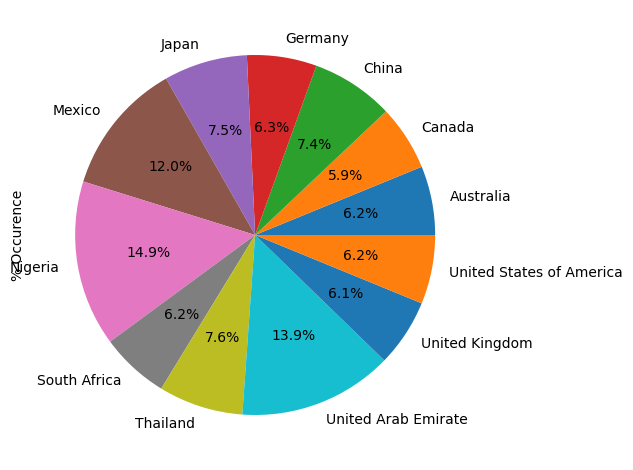

In [18]:
#chart_cancer.plot(kind = "pie", autopct = "%.1f%%")
#plt.tight_layout()

In [19]:
list(chart_cancer.values)

[0.143924354,
 0.136374974,
 0.172758455,
 0.145549718,
 0.174615386,
 0.278045382,
 0.346479686,
 0.143661281,
 0.176716753,
 0.322616286,
 0.141150112,
 0.144122298]

In [20]:
list(chart_cancer.index)

['Australia',
 'Canada',
 'China',
 'Germany',
 'Japan',
 'Mexico',
 'Nigeria',
 'South Africa',
 'Thailand',
 'United Arab Emirate',
 'United Kingdom',
 'United States of America']

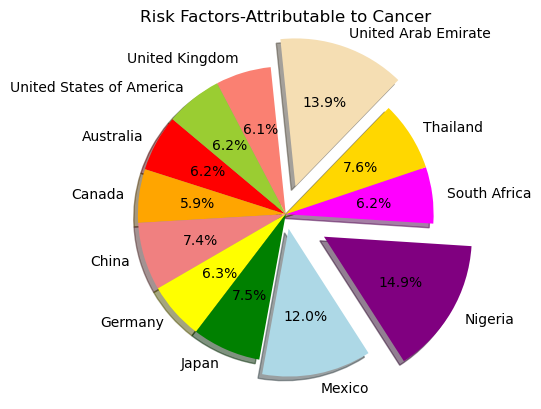

In [21]:
# Labels for the sections of our pie chart
labels = list(chart_cancer.index)

# The values of each section of the pie chart
sizes = list(chart_cancer.values)
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "yellow","green","lightblue","purple", "magenta", "gold", "wheat", "salmon", "yellowgreen"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0, 0, 0, 0.1, 0.3, 0, 0, 0.2, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Risk Factors-Attributable to Cancer")
plt.savefig("Risk Factors-Attributable to Cancer.png")
plt.show()


In [23]:
HAQ_data

,location_id,location_name,year_id,age_group_id,age_group_name,haq_index_age_type,indicator_id,indicator_name,measure,val,upper,lower
0,6,China,1990,27,Age-standardized,Overall,100,HAQ Index,Index,35.033943,38.778109,31.591303
1,6,China,1990,27,Age-standardized,Overall,297,Tuberculosis,Mortality-to-incidence ratios (MIR),0.151080,0.179177,0.126658
2,6,China,1990,27,Age-standardized,Overall,302,Diarrheal diseases,Mortality-to-incidence ratios (MIR),0.000377,0.000491,0.000291
3,6,China,1990,27,Age-standardized,Overall,322,Lower respiratory infections,Risk-standardised death rates (RSD),0.000904,0.001042,0.000768
4,6,China,1990,27,Age-standardized,Overall,328,Upper respiratory infections,Risk-standardised death rates (RSD),0.000019,0.000032,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...
45283,522,Sudan,2019,232,65-74 years,Post-working,545,Idiopathic epilepsy,Risk-standardised death rates (RSD),0.000050,0.000071,0.000032
45284,522,Sudan,2019,232,65-74 years,Post-working,589,Chronic kidney disease,Risk-standardised death rates (RSD),0.002562,0.004014,0.001731
45285,522,Sudan,2019,232,65-74 years,Post-working,643,Congenital heart anomalies,Risk-standardised death rates (RSD),0.000006,0.000010,0.000003
45286,522,Sudan,2019,232,65-74 years,Post-working,708,Adverse effects of medical treatment,Mortality-to-incidence ratios (MIR),0.023332,0.041841,0.010840


In [24]:
#HAQ_indicator_count = (HAQ_data["indicator_name"].unique())
#HAQ_indicator_count

array(['HAQ Index', 'Tuberculosis', 'Diarrheal diseases',
       'Lower respiratory infections', 'Upper respiratory infections',
       'Diphtheria', 'Whooping cough', 'Tetanus', 'Measles',
       'Maternal disorders', 'Neonatal disorders', 'Breast cancer',
       'Cervical cancer', 'Uterine cancer', 'Colon and rectum cancer',
       'Testicular cancer', 'Hodgkin lymphoma', 'Leukemia',
       'Rheumatic heart disease', 'Ischemic heart disease', 'Stroke',
       'Hypertensive heart disease', 'Chronic respiratory diseases',
       'Peptic ulcer disease', 'Appendicitis',
       'Inguinal, femoral, and abdominal hernia',
       'Gallbladder and biliary diseases', 'Idiopathic epilepsy',
       'Diabetes mellitus', 'Chronic kidney disease',
       'Congenital heart anomalies',
       'Adverse effects of medical treatment',
       'Non-melanoma skin cancer (squamous-cell carcinoma)'], dtype=object)

In [25]:
#HAQ_location_count = (HAQ_data["location_name"].unique())
#HAQ_location_count

In [27]:
organized_HAQ_data_df = HAQ_data[["location_name","measure","val"]]
organized_HAQ_data_df

,location_name,measure,val
0,China,Index,35.033943
1,China,Mortality-to-incidence ratios (MIR),0.151080
2,China,Mortality-to-incidence ratios (MIR),0.000377
3,China,Risk-standardised death rates (RSD),0.000904
4,China,Risk-standardised death rates (RSD),0.000019
...,...,...,...
45283,Sudan,Risk-standardised death rates (RSD),0.000050
45284,Sudan,Risk-standardised death rates (RSD),0.002562
45285,Sudan,Risk-standardised death rates (RSD),0.000006
45286,Sudan,Mortality-to-incidence ratios (MIR),0.023332


In [28]:
renamed_HAQ_data = organized_HAQ_data_df.rename(columns={"location_name":"Country", "haq_index_age_type":"HAQ Index Type", 
                                                      "measure":"Index", "val": "% Rate"})
renamed_HAQ_data.head()

,Country,Index,% Rate
0,China,Index,35.033943
1,China,Mortality-to-incidence ratios (MIR),0.151080
2,China,Mortality-to-incidence ratios (MIR),0.000377
3,China,Risk-standardised death rates (RSD),0.000904
4,China,Risk-standardised death rates (RSD),0.000019


In [30]:
cleaned_HAQ_data_df = renamed_HAQ_data.groupby(["Country"]).mean()["% Rate"]
cleaned_HAQ_data_df

Country
Afghanistan                           1.103672
Albania                               2.191841
Algeria                               1.974207
American Samoa                        1.817016
Andorra                               3.004983
                                        ...   
Venezuela (Bolivarian Republic of)    1.878041
Viet Nam                              1.896825
Yemen                                 1.458198
Zambia                                1.190751
Zimbabwe                              1.334932
Name: % Rate, Length: 204, dtype: float64

In [38]:
#renamed_HAQ_data["Country"].value_counts()

In [39]:
HAQ_cleaned_df =renamed_HAQ_data[renamed_HAQ_data["Country"].isin(["Democratic People's Republic of Korea",
       'Taiwan (Province of China)', 'Cambodia', 'Indonesia',
       "Lao People's Democratic Republic", 'Malaysia', 'Maldives',
       'Myanmar', 'Philippines', 'Sri Lanka', 'Thailand', 'Timor-Leste',
       'Viet Nam', 'Fiji', 'Kiribati', 'Marshall Islands',
       'Micronesia (Federated States of)', 'Papua New Guinea', 'Samoa',
       'Solomon Islands', 'Tonga', 'Vanuatu', 'Armenia', 'Azerbaijan',
       'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Mongolia', 'Tajikistan',
       'Turkmenistan', 'Uzbekistan', 'Albania', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czechia', 'Hungary', 'North Macedonia',
       'Montenegro', 'Poland', 'Romania', 'Serbia', 'Slovakia',
       'Slovenia', 'Belarus', 'Estonia', 'Latvia', 'Lithuania',
       'Republic of Moldova', 'Russian Federation', 'Ukraine',
       'Brunei Darussalam', 'Republic of Korea', 'Singapore', 'New Zealand', 'Andorra', 'Austria', 'Belgium',
       'Cyprus', 'Denmark', 'Finland', 'Greece',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'Argentina', 'Chile', 'Uruguay', 'Antigua and Barbuda',
       'Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica',
       'Dominican Republic', 'Grenada', 'Guyana', 'Haiti', 'Jamaica',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'Bolivia (Plurinational State of)',
       'Ecuador', 'Peru', 'Colombia', 'Costa Rica', 'El Salvador',
       'Guatemala', 'Honduras', 'Nicaragua', 'Panama',
       'Venezuela (Bolivarian Republic of)', 'Brazil', 'Paraguay',
       'Algeria', 'Bahrain', 'Egypt', 'Iran (Islamic Republic of)',
       'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
       'Palestine', 'Oman', 'Qatar', 'Saudi Arabia',
       'Syrian Arab Republic', 'Tunisia', 'Türkiye', 'Yemen', 'Afghanistan', 'Bangladesh',
       'Bhutan', 'India', 'Nepal', 'Pakistan', 'Angola',
       'Central African Republic', 'Congo',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon',
       'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda',
       'Seychelles', 'Somalia', 'United Republic of Tanzania', 'Uganda',
       'Zambia', 'Botswana', 'Lesotho', 'Namibia', 
       'Eswatini', 'Zimbabwe', 'Benin', 'Burkina Faso', 'Cameroon',
       'Cabo Verde', 'Chad', "Côte d'Ivoire", 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'Togo', 'American Samoa', 'Bermuda', 'Cook Islands', 'Greenland',
       'Guam', 'Monaco', 'Nauru', 'Niue', 'Northern Mariana Islands',
       'Palau', 'Puerto Rico', 'Saint Kitts and Nevis', 'San Marino',
       'Tokelau', 'Tuvalu', 'United States Virgin Islands', 'South Sudan',
       'Sudan'])==False]

In [40]:
HAQ_cleaned_df["Country"].value_counts()

China                       222
Japan                       222
Australia                   222
France                      222
Germany                     222
United Kingdom              222
Canada                      222
United States of America    222
Mexico                      222
United Arab Emirates        222
South Africa                222
Nigeria                     222
Name: Country, dtype: int64

In [42]:
chart_HAQ_cleaned_df = HAQ_cleaned_df.groupby(["Country"]).mean()["% Rate"]
chart_HAQ_cleaned_df

Country
Australia                   3.035765
Canada                      3.073153
China                       2.075577
France                      2.866224
Germany                     2.841593
Japan                       2.957778
Mexico                      1.773487
Nigeria                     1.213372
South Africa                1.710442
United Arab Emirates        1.986494
United Kingdom              2.775679
United States of America    2.818708
Name: % Rate, dtype: float64

In [43]:
list(chart_HAQ_cleaned_df.values)

[3.0357649068798795,
 3.073152533684641,
 2.0755765869808385,
 2.866223757697771,
 2.8415932377072273,
 2.9577783651360807,
 1.7734868161581034,
 1.2133716563047792,
 1.7104423927501369,
 1.986493909111936,
 2.77567904692409,
 2.818708122737125]

In [44]:
list(chart_HAQ_cleaned_df.index)

['Australia',
 'Canada',
 'China',
 'France',
 'Germany',
 'Japan',
 'Mexico',
 'Nigeria',
 'South Africa',
 'United Arab Emirates',
 'United Kingdom',
 'United States of America']

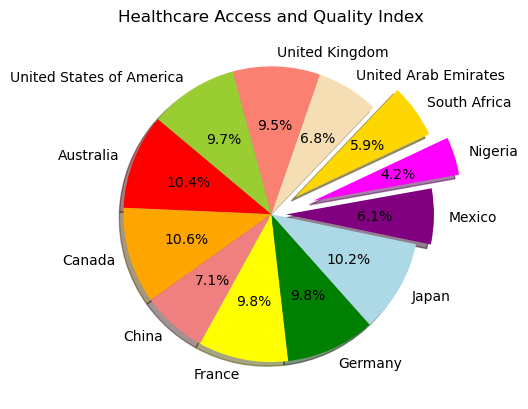

In [47]:
# Labels for the sections of our pie chart
labels = list(chart_HAQ_cleaned_df.index)

# The values of each section of the pie chart
sizes = list(chart_HAQ_cleaned_df.values)
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "yellow","green","lightblue","purple", "magenta", "gold", "wheat", "salmon", "yellowgreen"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.2, 0, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Healthcare Access and Quality Index")
plt.savefig("Healthcare Access and Quality Index.png")
plt.show()

<Axes: ylabel='% Occurence'>

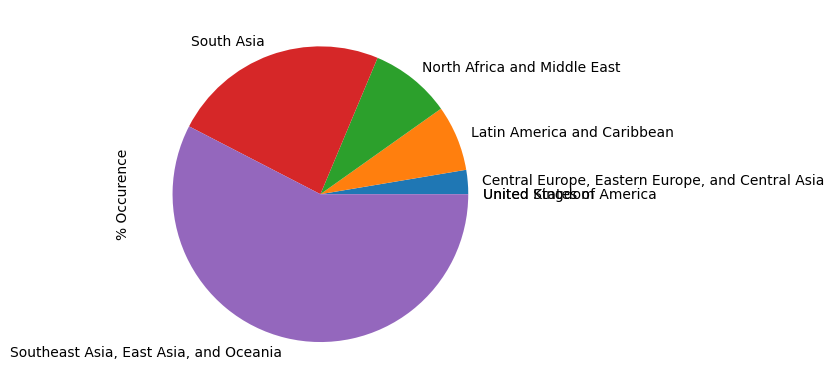

In [137]:
#chart = new_cancer_cleaned_df.groupby(["Country"]).mean()["% Occurence"]
#chart.plot(kind = "pie")

In [106]:
test = cancer_cleaned_df[cancer_cleaned_df["Disease"] == "Total cancers"]
non=test[test["Country"].isin(["Low SDI", "Low-middle SDI", "High SDI", "High-income", "Non-high SDI", "High-middle SDI",
                              "Middle SDI", "Suriname", "Trinidad and Tobago", "Morocco", "Saint Vincent and the Grenadines",
                              "United States Virgin Islands"])==False]
non

,Country,Disease,Outcome,% Occurence,upper,lower
0,Global,Total cancers,DALYs (Disability-Adjusted Life Years),0.156322,0.000000,0.000000
1,Armenia,Total cancers,DALYs (Disability-Adjusted Life Years),0.159399,0.000000,0.000000
2,Azerbaijan,Total cancers,DALYs (Disability-Adjusted Life Years),0.226542,0.000000,0.000000
3,Georgia,Total cancers,DALYs (Disability-Adjusted Life Years),0.175258,0.000000,0.000000
4,Kazakhstan,Total cancers,DALYs (Disability-Adjusted Life Years),0.180321,0.000000,0.000000
...,...,...,...,...,...,...
265,South Asia,Total cancers,Deaths,16962.103510,25399.315830,8842.537588
266,South Asia,Total cancers,Deaths,98012.882720,145955.152700,55607.961930
267,Sub-Saharan Africa,Total cancers,Deaths,9653.222977,15306.112100,5371.745221
268,Sub-Saharan Africa,Total cancers,Deaths,4093.962975,6537.858189,1976.581084


<Axes: ylabel='% Occurence'>

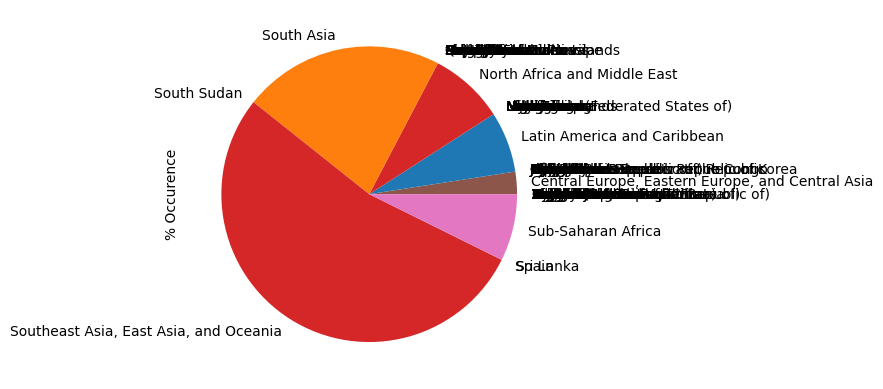

In [107]:

chart = non.groupby(["Country"]).mean()["% Occurence"]
chart.plot(kind = "pie")

In [61]:
cancer_pie = cancer_cleaned_df.groupby(["Country","Disease"]).mean()["% Occurence"]
cancer_pie

Country                                           Disease                                
Central Europe, Eastern Europe, and Central Asia  Total cancers                              6.868686e+04
Global                                            Bladder cancer                             8.310691e+04
                                                  Brain and central nervous system cancer    1.375060e+00
                                                  Breast cancer                              3.935790e+05
                                                  Cervical cancer                            3.187949e-01
                                                                                                 ...     
Non-high SDI                                      Uterine cancer                             2.991636e+05
North Africa and Middle East                      Total cancers                              2.303138e+05
South Asia                                        Total cancer

In [ ]:
private_to_chalfon = df.loc[["PRIVATE STREET", "4TH", "11TH", "ADDINGTON", 
                              "CHALFONT"], ["STREET NAME ID", "STREET FULL NAME", "POSTAL COMMUNITY"]]
print(private_to_chalfont)


In [ ]:
clean_cancer_pie = cancer_pie.groupby(["Country","Disease"]).mean()["% Occurence"]
cancer_pie

In [59]:
# Labels for the sections of our pie chart
labels = ["Bladder cancer", "Brain and central nervous system cancer", "Breast cancer", "Cervical cancer", "Colon and rectum cancer",
         "Esophageal cancer", "Gallbladder and biliary tract cancer", "Hodgkin lymphoma", "Kidney cancer", "Larynx cancer",
         "Leukemia", "Lip and oral cavity cancer ", "Liver cancer", "Malignant skin melanoma", "Mesothelioma", "Multiple myeloma",
         "Nasopharynx cancer", "Non-Hodgkin lymphoma", "Non-melanoma skin cancer", "Other malignant neoplasms", "Other neoplasms",
         "Other pharynx cancer", "Ovarian cancer", "Pancreatic cancer", "Prostate cancer", "Stomach cancer", "Testicular cancer",
         "Thyroid cancer", "Tracheal, bronchus, and lung cancer", "Uterine cancer"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100, 220, 95, 80, 100, 220, 95, 80, 100, 220, 95, 80, 100, 220, 95, 80, 100, 220, 95, 80, 100, 220, 95, 80, 100, 95, 80]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "yellow","green","lightblue","purple","yellowgreen","blue", 
         "blueviolet", "brown", "white", "chartreuse", "chocolate", "coral", "crimson", "cornflowerblue", "cyan",
         "darkblue", "darkgreen", "darkmagenta", "darkolivegreen", "darkorchid", "darkred", "darkgoldenrod",
         "darkgray", "darkseagreen", "deeppink", "deepskyblue", "darkviolet", ]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x13c24fd90>,
 [Text(-1.0483139280299418, 0.5839845103240616, 'Bladder cancer'),
  Text(-1.0694095946559654, 0.25761040129964474, 'Brain and central nervous system cancer'),
  Text(-1.0959960285627177, 0.09376942665256455, 'Breast cancer'),
  Text(-1.0973057177810508, -0.07694258719989376, 'Cervical cancer'),
  Text(-1.0347399604470136, -0.37324685431241494, 'Colon and rectum cancer'),
  Text(-0.8965061148974867, -0.6373984514818142, 'Esophageal cancer'),
  Text(-0.7903939188694438, -0.7650342822476673, 'Gallbladder and biliary tract cancer'),
  Text(-0.6625018768144866, -0.8781180235123768, 'Hodgkin lymphoma'),
  Text(-0.397944363213992, -1.0254951407911257, 'Kidney cancer'),
  Text(-0.10795005880469191, -1.0946902688907323, 'Larynx cancer'),
  Text(0.0579909386320723, -1.098470323238899, 'Leukemia'),
  Text(0.22725813289365654, -1.0762684335395558, 'Lip and oral cavity cancer '),
  Text(0.5121293169894144, -0.9735109463585687, 'Liver cancer'),
  Text(0.

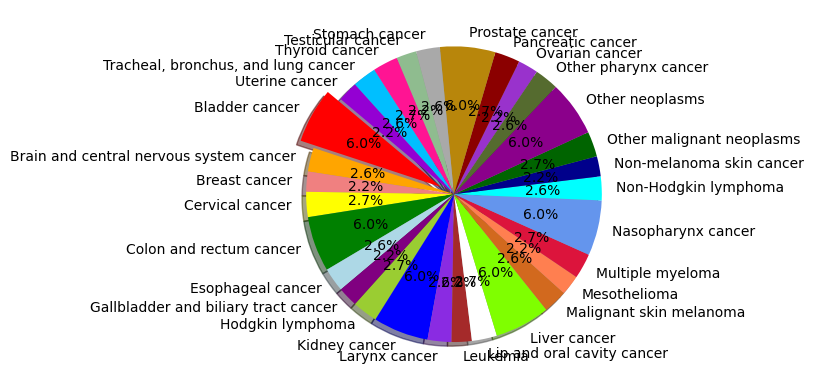

In [60]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [50]:
HAQ_data

,location_id,location_name,year_id,age_group_id,age_group_name,haq_index_age_type,indicator_id,indicator_name,measure,val,upper,lower
0,6,China,1990,27,Age-standardized,Overall,100,HAQ Index,Index,35.033943,38.778109,31.591303
1,6,China,1990,27,Age-standardized,Overall,297,Tuberculosis,Mortality-to-incidence ratios (MIR),0.151080,0.179177,0.126658
2,6,China,1990,27,Age-standardized,Overall,302,Diarrheal diseases,Mortality-to-incidence ratios (MIR),0.000377,0.000491,0.000291
3,6,China,1990,27,Age-standardized,Overall,322,Lower respiratory infections,Risk-standardised death rates (RSD),0.000904,0.001042,0.000768
4,6,China,1990,27,Age-standardized,Overall,328,Upper respiratory infections,Risk-standardised death rates (RSD),0.000019,0.000032,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...
45283,522,Sudan,2019,232,65-74 years,Post-working,545,Idiopathic epilepsy,Risk-standardised death rates (RSD),0.000050,0.000071,0.000032
45284,522,Sudan,2019,232,65-74 years,Post-working,589,Chronic kidney disease,Risk-standardised death rates (RSD),0.002562,0.004014,0.001731
45285,522,Sudan,2019,232,65-74 years,Post-working,643,Congenital heart anomalies,Risk-standardised death rates (RSD),0.000006,0.000010,0.000003
45286,522,Sudan,2019,232,65-74 years,Post-working,708,Adverse effects of medical treatment,Mortality-to-incidence ratios (MIR),0.023332,0.041841,0.010840


In [51]:
HAQ_data.columns

Index(['location_id', 'location_name', 'year_id', 'age_group_id',
       'age_group_name', 'haq_index_age_type', 'indicator_id',
       'indicator_name', 'measure', 'val', 'upper', 'lower'],
      dtype='object')

In [52]:
organized_HAQ_data = HAQ_data[["location_name","age_group_name","haq_index_age_type","indicator_name","val","upper","lower"]]
organized_HAQ_data

,location_name,age_group_name,haq_index_age_type,indicator_name,val,upper,lower
0,China,Age-standardized,Overall,HAQ Index,35.033943,38.778109,31.591303
1,China,Age-standardized,Overall,Tuberculosis,0.151080,0.179177,0.126658
2,China,Age-standardized,Overall,Diarrheal diseases,0.000377,0.000491,0.000291
3,China,Age-standardized,Overall,Lower respiratory infections,0.000904,0.001042,0.000768
4,China,Age-standardized,Overall,Upper respiratory infections,0.000019,0.000032,0.000002
...,...,...,...,...,...,...,...
45283,Sudan,65-74 years,Post-working,Idiopathic epilepsy,0.000050,0.000071,0.000032
45284,Sudan,65-74 years,Post-working,Chronic kidney disease,0.002562,0.004014,0.001731
45285,Sudan,65-74 years,Post-working,Congenital heart anomalies,0.000006,0.000010,0.000003
45286,Sudan,65-74 years,Post-working,Adverse effects of medical treatment,0.023332,0.041841,0.010840


In [53]:
new_HAQ_df = organized_HAQ_data.rename(columns={"location_name":"Country", "age_group_name": "Patient Age",
                                                "haq_index_age_type": "HAQ index", "indicator_name":"Disease",
                                                "val": "% Occurence"})
new_HAQ_df

,Country,Patient Age,HAQ index,Disease,% Occurence,upper,lower
0,China,Age-standardized,Overall,HAQ Index,35.033943,38.778109,31.591303
1,China,Age-standardized,Overall,Tuberculosis,0.151080,0.179177,0.126658
2,China,Age-standardized,Overall,Diarrheal diseases,0.000377,0.000491,0.000291
3,China,Age-standardized,Overall,Lower respiratory infections,0.000904,0.001042,0.000768
4,China,Age-standardized,Overall,Upper respiratory infections,0.000019,0.000032,0.000002
...,...,...,...,...,...,...,...
45283,Sudan,65-74 years,Post-working,Idiopathic epilepsy,0.000050,0.000071,0.000032
45284,Sudan,65-74 years,Post-working,Chronic kidney disease,0.002562,0.004014,0.001731
45285,Sudan,65-74 years,Post-working,Congenital heart anomalies,0.000006,0.000010,0.000003
45286,Sudan,65-74 years,Post-working,Adverse effects of medical treatment,0.023332,0.041841,0.010840


In [ ]:
per_school_budget = school_data_complete.groupby("school_name").mean()["budget"]
per_school_budget

In [28]:
location_name = cancer_data.set_index(["location_name"])["cause_name"]
location_name

location_name
Global           Total cancers
Armenia          Total cancers
Azerbaijan       Total cancers
Georgia          Total cancers
Kazakhstan       Total cancers
                    ...       
Global        Multiple myeloma
Global                Leukemia
Global                Leukemia
Global                Leukemia
Global                Leukemia
Name: cause_name, Length: 2321, dtype: object

In [29]:
# cause_name = cancer_data.set_index(["cause_name"])["measure"]
# cause_name

In [30]:
per_cancer_counts = GBD_data_complete["cause_name"].value_counts()
per_cancer_counts

Total cancers                                       44921
Tracheal, bronchus, and lung cancer                   104
Colon and rectum cancer                               104
Liver cancer                                          100
Breast cancer                                          98
Esophageal cancer                                      96
Pancreatic cancer                                      92
Larynx cancer                                          92
Kidney cancer                                          92
Leukemia                                               92
Nasopharynx cancer                                     92
Bladder cancer                                         88
Lip and oral cavity cancer                             88
Other pharynx cancer                                   88
Stomach cancer                                         88
Gallbladder and biliary tract cancer                   84
Thyroid cancer                                         84
Multiple myelo

In [31]:
per_death_counts = GBD_data_complete["measure_name"].value_counts()
per_death_counts

DALYs (Disability-Adjusted Life Years)    45918
Deaths                                     1045
Name: measure_name, dtype: int64

In [ ]:
# Labels for the sections of our pie chart
labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

In [ ]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)